In [5]:
import numpy as np
from scipy import stats
import sys
%load_ext autoreload
%autoreload 2
sys.path.append("/home/ebrahim/brainaudio/figure_data/")

from utils import one_sample_t_test, paired_t_test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


--- Paired T-Test Results ---
Mean A: 9.3732
Mean B: 9.7105
Mean difference (A - B): -0.3373
T-statistic:    -4.58548
P-value:        0.00132

Conclusion: The difference is statistically significant (Reject H0).
A is significantly better than B.


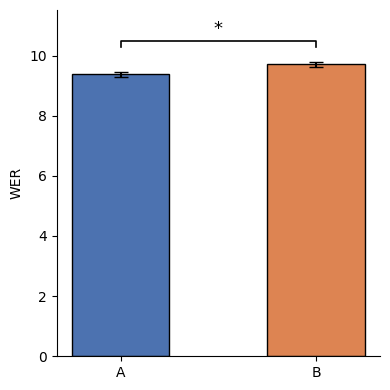

(np.float64(-4.585478527375399), np.float64(0.001317488396748739))

In [6]:
baseline_results = np.load("saved_data/baseline_5_gram_results.npy")
main_results = np.load("saved_data/main_results.npy")
paired_t_test(main_results, baseline_results)

In [7]:
# The single Baseline value to test against
baseline_ref = 9.76

one_sample_t_test(baseline_ref, main_results)

--- Results ---
Mean across seeds: 9.3732 (vs Baseline: 9.76)
T-statistic:    -4.93751
P-value:        0.00080

Conclusion: The difference is statistically significant (Reject H0).
Your model is significantly better than baseline.


In [12]:
val_scores = np.load("saved_data/val_scores.npy")

### Abalation #1: Calling LLM only once at the end of decoding

--- Paired T-Test Results ---
Mean A: 17.1743
Mean B: 14.1690
Mean difference (A - B): 3.0053
T-statistic:    41.01201
P-value:        0.00000

Conclusion: The difference is statistically significant (Reject H0).
B is significantly better than A.


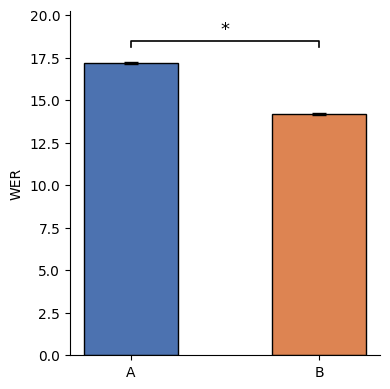

In [13]:
no_delayed_fusion_variants = np.load("saved_data/no_delayed_fusion_ablation.npy")*100
t, p = paired_t_test(no_delayed_fusion_variants, val_scores) 

### Abalation #2: No LLM Fine-tuning

--- Paired T-Test Results ---
Mean A: 15.8916
Mean B: 14.1690
Mean difference (A - B): 1.7226
T-statistic:    16.16426
P-value:        0.00000

Conclusion: The difference is statistically significant (Reject H0).
B is significantly better than A.


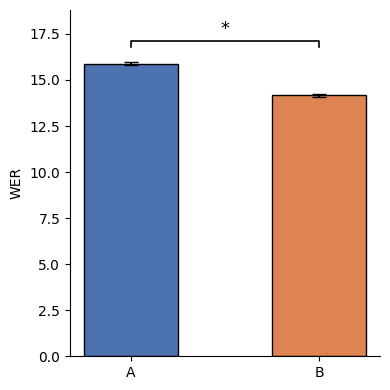

In [14]:
no_finetuning_variants = np.load("saved_data/no_finetuning_ablation.npy")*100
t, p = paired_t_test(no_finetuning_variants, val_scores) 

### Abalation #3: No LLM Fine-tuning

--- Paired T-Test Results ---
Mean A: 14.0520
Mean B: 14.1690
Mean difference (A - B): -0.1170
T-statistic:    -1.52364
P-value:        0.16193

Conclusion: The difference is NOT statistically significant (Fail to reject H0).


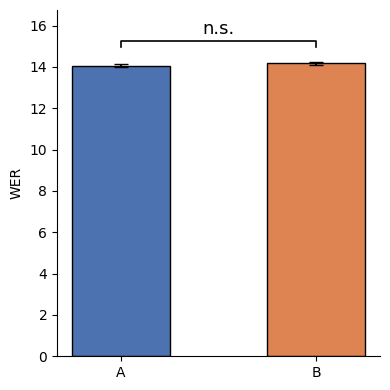

In [15]:
no_phoneme_variants = np.load("saved_data/no_variants_ablation.npy")*100
t, p =paired_t_test(no_phoneme_variants, val_scores)


In [ ]:
no_phoneme_variants = np.load("saved_data/llama_3b_ablation.npy")*100
t, p =paired_t_test(no_phoneme_variants, val_scores)